## KNN을 활용한 럭키백의 확률 구하기

In [1]:
import pandas as pd

In [2]:
fish = pd.read_csv("https://bit.ly/fish_csv_data")

In [3]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [4]:
pd.unique(fish["Species"])

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [5]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()

In [6]:
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [7]:
fish_target = fish['Species'].to_numpy()

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
trian_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 42)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
ss = StandardScaler()
ss.fit(trian_input)
train_scaled = ss.transform(trian_input)
test_scaled = ss.transform(test_input)

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
kn = KNeighborsClassifier(n_neighbors = 3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled,train_target))
print(kn.score(test_scaled,test_target))

0.8907563025210085
0.85


In [14]:
import numpy as np

In [15]:
print(kn.classes_, end = '\n\n')
print(kn.predict(test_scaled[:5]), end = '\n\n')
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals = 4), end = '\n\n')

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]



#### 위 예시처럼 KNN을 활용하면 확률값은 구해짐, 그러나 3개의 이웃을 사용하여, 0/3, 1/3, 2/3, 3/3과 같은 단순한 확률

## 로지스틱 회귀(Logistic regression)
* 이름은 회귀이지만 분류 모델이다.
* 선형 회귀와 동일하게 선형 방정식을 학습한다.
* 확률이 되려면 0~1(0~100%) 사이 값이 되어야 한다. 이를 위해 시그모이드 함수(로지스틱 함수)를 사용한다

In [16]:
import numpy as np
import matplotlib.pyplot as plt

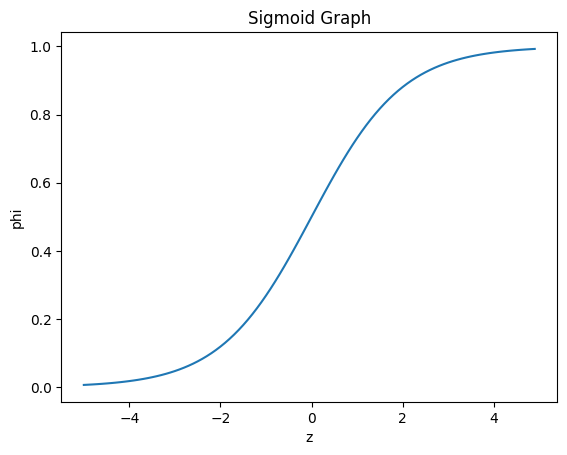

In [17]:
# 시그모이드 함수 그래프
z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z)) 
plt.plot(z,phi)
plt.title("Sigmoid Graph")
plt.xlabel("z")
plt.ylabel("phi")
plt.show()

In [18]:
bream_smelt_indexes = (train_target == "Bream") | (train_target == "Smelt")
train_bream_smelt = train_scaled[bream_smelt_indexes]
test_bream_smelt = train_target[bream_smelt_indexes]

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
lr = LogisticRegression()
lr.fit(train_bream_smelt, test_bream_smelt)
lr.predict(train_bream_smelt[:5])

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream'], dtype=object)

In [21]:
print(lr.predict_proba(train_bream_smelt[:5]), end = "\n\n")
print(lr.classes_)

[[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]

['Bream' 'Smelt']


In [22]:
print(lr.coef_, lr.intercept_)

[[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]


In [23]:
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02991358  3.57043428 -5.26630496 -4.24382314 -6.06135688]


In [24]:
from scipy.special import expit
print(expit(decisions))

[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]


## 로지스틱 회귀를 사용한 다중 분류

In [33]:
lr = LogisticRegression(C = 20, max_iter = 1000)
lr.fit(train_scaled,train_target)
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))

0.9327731092436975
0.925


In [35]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [37]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba,decimals = 3))

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [42]:
print(lr.classes_)
print(lr.coef_.shape, lr.intercept_.shape)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
(7, 5) (7,)


## 소프트맥스 함수
* 여러 개의 선형 방정식의 출력값을 0 ~ 1 사이로 압축
* 전체 합이 1이 되도록 만든다

In [43]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals = 2))

[[ -6.51   1.04   5.17  -2.76   3.34   0.35  -0.63]
 [-10.88   1.94   4.78  -2.42   2.99   7.84  -4.25]
 [ -4.34  -6.24   3.17   6.48   2.36   2.43  -3.87]
 [ -0.69   0.45   2.64  -1.21   3.26  -5.7    1.26]
 [ -6.4   -1.99   5.82  -0.13   3.5   -0.09  -0.7 ]]


In [44]:
from scipy.special import softmax

In [47]:
proba = softmax(decision, axis = 1)
print(np.around(proba, decimals = 3))

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
